#QTM 151 Final Project
Lola Pawar, Anish Nayak, Avi Sinha, Gloria Wang

##Introduction:

Formula 1, also referred to as F1, is the largest, most popular international motor racing competition in the world. With the Grands Prix locations spread all across the world, this high level sport has a wide fan base and eager spectators that come and watch the thrill of the races. At the end of the season two annual world championship titles are awarded, one to the best driver and one to the top constructor. While the overall competition is based around a cumulative point system, many additional variables can be analyzed to help determine what drivers are the best of the best.  Through using the methods and techniques learned throughout this past semester, our group's goal of this project was to look at these variables and determine in all of racing history, what nationality has produced the overall best drivers. 

We chose to look at the variables: points, final position, and fastest lap time of the individual drivers to determine what nationalities lead in these categories. Before being able to examine these columns we must merge, clean, aggregate, and subset the data in order to be sure of reliable results. 

**finish when all code and results are completed**

##Data Description:

Our group chose to use the dataset tables, drivers table and results table to help answer our question. The drivers table contains biographical information about the individual drivers participating in F1 including their drivers ID, name, nationality and other personal information. This table contains the details on every driver that has ever raced in the formula 1 competition starting in 1950. It has a total of 857 rows with each row representing a different driver. This table allows us to group the drivers by their nationality and therefore analyze by countries. The results table is a giant dataset containing 25,840 rows with 18 columns. Each row represents a driver's statistics for each individual race. By looking at these two tables we are able to investigate how drivers' results vary by nationality. 

In [131]:
#import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import data:
drivers = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv")

#rows:
print("The drivers dataset has " + str(len(drivers)) + " rows.")
print("The results dataset has " + str(len(results)) + " rows.")

The drivers dataset has 857 rows.
The results dataset has 25840 rows.


##Merging Procedure Description:

The drivers nationalities are located in the drivers table dataset while all the race results that we will be using are in the results table dataset. In order to combat this issue we need to merge the two tables to create a new larger dataset with both table’s data. We will use the pandas function, merge, to combine the two. Because we will only be looking at specific results columns and personal information we do not need to combine all elements of both datasets but instead can specify which ones we want by adding specific column names in our merge function. Because both tables have driversID we will use it to join the two while keeping drivers as our primary table. By doing these steps we will result in a larger dataset that will include the columns, 'driverId','nationality', 'forename', 'surname', 'position', 'fastestLapSpeed', and ’points’. 

In [173]:
#MERGE CODE:
merged_data = pd.merge(drivers[['driverId','nationality', 'forename', 'surname']],
                         results[['driverId','position', 'fastestLapSpeed',"points"]],
                         on='driverId',
                         how = "left")

merged_data.head()

,driverId,nationality,forename,surname,position,fastestLapSpeed,points
0,1,British,Lewis,Hamilton,1,218.300,10.0
1,1,British,Lewis,Hamilton,5,209.033,4.0
2,1,British,Lewis,Hamilton,13,203.969,0.0
3,1,British,Lewis,Hamilton,3,204.323,6.0
4,1,British,Lewis,Hamilton,2,222.085,8.0


##Cleaning Data Description: 

The initial dataset appears to be pretty clean overall but to ensure that our aggregations and visualizations run smoothly we took precautionary cleaning measures. Our first step was to drop any duplicates from the dataset to ensure every observation is unique. Next, we individually converted each column to a numeric format, replaced /n with nan values and then proceeded to drop them from the dataset. We stored this newly cleaned data in new columns called position_numeric, points_numeric, and fastestLapSpeed_numeric to separate the cleaned data. After completing these steps we stored the cleaned dataset in a new csv file. 

In [174]:
#drop any duplicates:
merged_data = merged_data.drop_duplicates()

#position:
merged_data['position_numeric'] = pd.to_numeric(merged_data['position'], errors='coerce')
merged_data['position_numeric'] = merged_data['position_numeric'].replace('\n', np.nan)
merged_data = merged_data.dropna(subset=["position_numeric"])


#fastestLapSpeed:
merged_data['fastestLapSpeed_numeric'] = pd.to_numeric(merged_data["fastestLapSpeed"], errors='coerce')
merged_data['fastestLapSpeed_numeric'] = merged_data['fastestLapSpeed_numeric'].replace('\n', np.nan)
merged_data = merged_data.dropna(subset=["fastestLapSpeed_numeric"])


#points:
merged_data["points_numeric"] = pd.to_numeric(merged_data["points"], errors='coerce')
merged_data['points_numeric'] = merged_data['points_numeric'].replace('\n', np.nan)
merged_data = merged_data.dropna(subset=["points_numeric"])

#store in csv file:
merged_data.to_csv("data_raw/data_clean.csv")

display(merged_data)

,driverId,nationality,forename,surname,position,fastestLapSpeed,points,position_numeric,fastestLapSpeed_numeric,points_numeric
0,1,British,Lewis,Hamilton,1,218.300,10.0,1.0,218.300,10.0
1,1,British,Lewis,Hamilton,5,209.033,4.0,5.0,209.033,4.0
2,1,British,Lewis,Hamilton,13,203.969,0.0,13.0,203.969,0.0
3,1,British,Lewis,Hamilton,3,204.323,6.0,3.0,204.323,6.0
4,1,British,Lewis,Hamilton,2,222.085,8.0,2.0,222.085,8.0
...,...,...,...,...,...,...,...,...,...,...
25835,855,Chinese,Guanyu,Zhou,12,193.682,0.0,12.0,193.682,0.0
25836,855,Chinese,Guanyu,Zhou,13,188.358,0.0,13.0,188.358,0.0
25837,855,Chinese,Guanyu,Zhou,12,204.643,0.0,12.0,204.643,0.0
25838,855,Chinese,Guanyu,Zhou,12,212.183,0.0,12.0,212.183,0.0


##Aggregation / Main Columns:

After cleaning our data the next step was to aggregate it into the averages of the columns grouped by nationality. In order to look at the country's mean results of the columns, position, points, and fastest lap speed we need to use the functions .groupby() and .agg(). The agg() function allows us to look at the averages of drivers final position, points, and fastest lap speed as well as their race count (how many races they have participated in). By using the groupby() function we can clarify that we are interested in looking at the results by each country (combining the results of individual drivers of the same nationality). After aggregating the data we use a .query() function to rule out outlying nationalities that have race counts lower than or equal to 100. 

In [170]:
#Postion:
mean_position = (merged_data.groupby("nationality", as_index = False)
.agg(mean_position = ("position_numeric","mean"),
     count_races = ("position_numeric",len),)
.sort_values(by="mean_position",ascending=True))

#Query to exclude countries that have too few races in the sample:
final_position = mean_position.query("count_races >= 100")

#Points:
mean_points = (merged_data.groupby("nationality",as_index = False)
 .agg(mean_points = ("points_numeric","mean"),
      count_races = ("points_numeric",len))
 .sort_values(by="mean_points",ascending=False))

#Query to exclude  countries that have too few races in sample:
final_points = mean_points.query("count_races >= 100")


#FastestLapSpeed:
mean_fastestLapSpeed = (merged_data.groupby("nationality", as_index = False)
.agg(mean_fastestLapSpeed = ("fastestLapSpeed_numeric","mean"),
     count_races = ("fastestLapSpeed_numeric",len),)
.sort_values(by="mean_fastestLapSpeed",ascending=False))

#Query to exclude countries that have too few races in the sample:
final_fastestLapSpeed = mean_fastestLapSpeed.query("count_races >= 100")

##Points Visualization Analysis:

,nationality,mean_points,count_races
14,Dutch,8.778509,228
16,Finnish,6.338111,593
3,Australian,5.843447,412
35,Spanish,5.391589,535
18,German,5.333470,1222
7,British,5.065951,1435
27,Mexican,4.370107,281
6,Brazilian,2.678571,672
17,French,1.930636,817
33,Russian,1.561404,171


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Dutch'),
  Text(1, 0, 'Finnish'),
  Text(2, 0, 'Australian'),
  Text(3, 0, 'Spanish'),
  Text(4, 0, 'German'),
  Text(5, 0, 'British'),
  Text(6, 0, 'Mexican'),
  Text(7, 0, 'Brazilian'),
  Text(8, 0, 'French'),
  Text(9, 0, 'Russian'),
  Text(10, 0, 'Danish'),
  Text(11, 0, 'Canadian'),
  Text(12, 0, 'Italian'),
  Text(13, 0, 'American'),
  Text(14, 0, 'Austrian'),
  Text(15, 0, 'Japanese'),
  Text(16, 0, 'Swiss'),
  Text(17, 0, 'Belgian'),
  Text(18, 0, 'Swedish')])

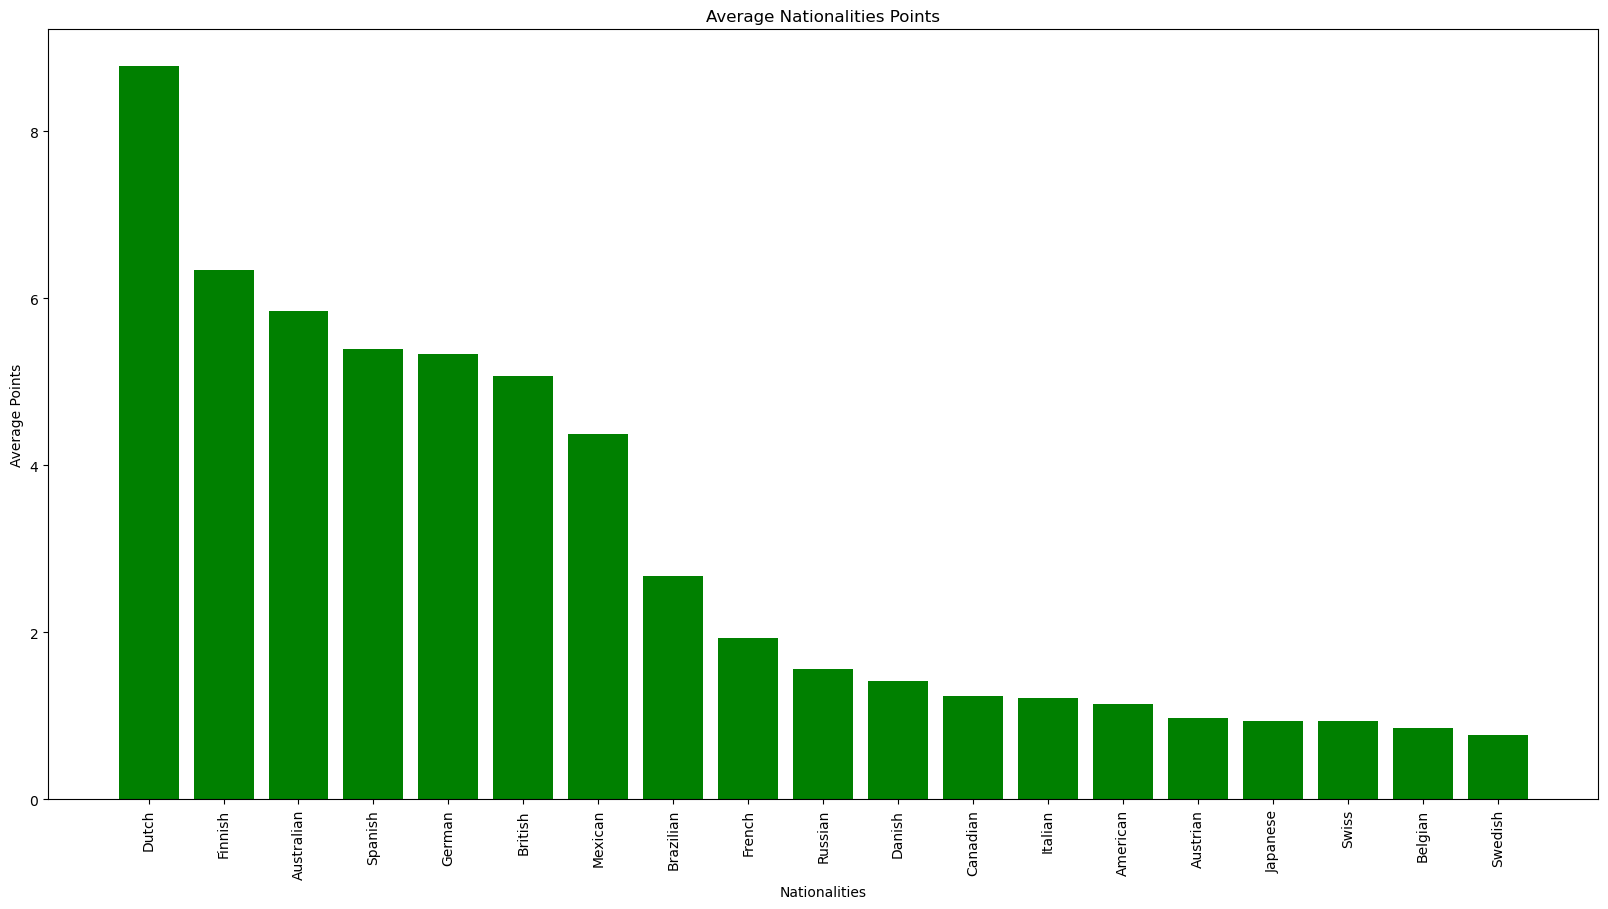

In [175]:
display(final_points)

#Points Visualization:
plt.figure(figsize=(20, 10))
plt.bar(data=final_points, height="mean_points", x="nationality", color="green")
#Labels:
plt.xlabel("Nationalities")
plt.ylabel("Average Points")
plt.title("Average Nationalities Points")
plt.xticks(rotation=90)

##Position Visualization Analysis:

,nationality,mean_position,count_races
16,Finnish,7.342327,593
14,Dutch,7.688596,228
7,British,7.818815,1435
3,Australian,7.825243,412
35,Spanish,7.985047,535
18,German,8.315876,1222
6,Brazilian,9.101190,672
27,Mexican,9.192171,281
23,Italian,9.628931,795
4,Austrian,9.722222,144


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Finnish'),
  Text(1, 0, 'Dutch'),
  Text(2, 0, 'British'),
  Text(3, 0, 'Australian'),
  Text(4, 0, 'Spanish'),
  Text(5, 0, 'German'),
  Text(6, 0, 'Brazilian'),
  Text(7, 0, 'Mexican'),
  Text(8, 0, 'Italian'),
  Text(9, 0, 'Austrian'),
  Text(10, 0, 'American'),
  Text(11, 0, 'Swiss'),
  Text(12, 0, 'French'),
  Text(13, 0, 'Belgian'),
  Text(14, 0, 'Swedish'),
  Text(15, 0, 'Japanese'),
  Text(16, 0, 'Canadian'),
  Text(17, 0, 'Danish'),
  Text(18, 0, 'Russian')])

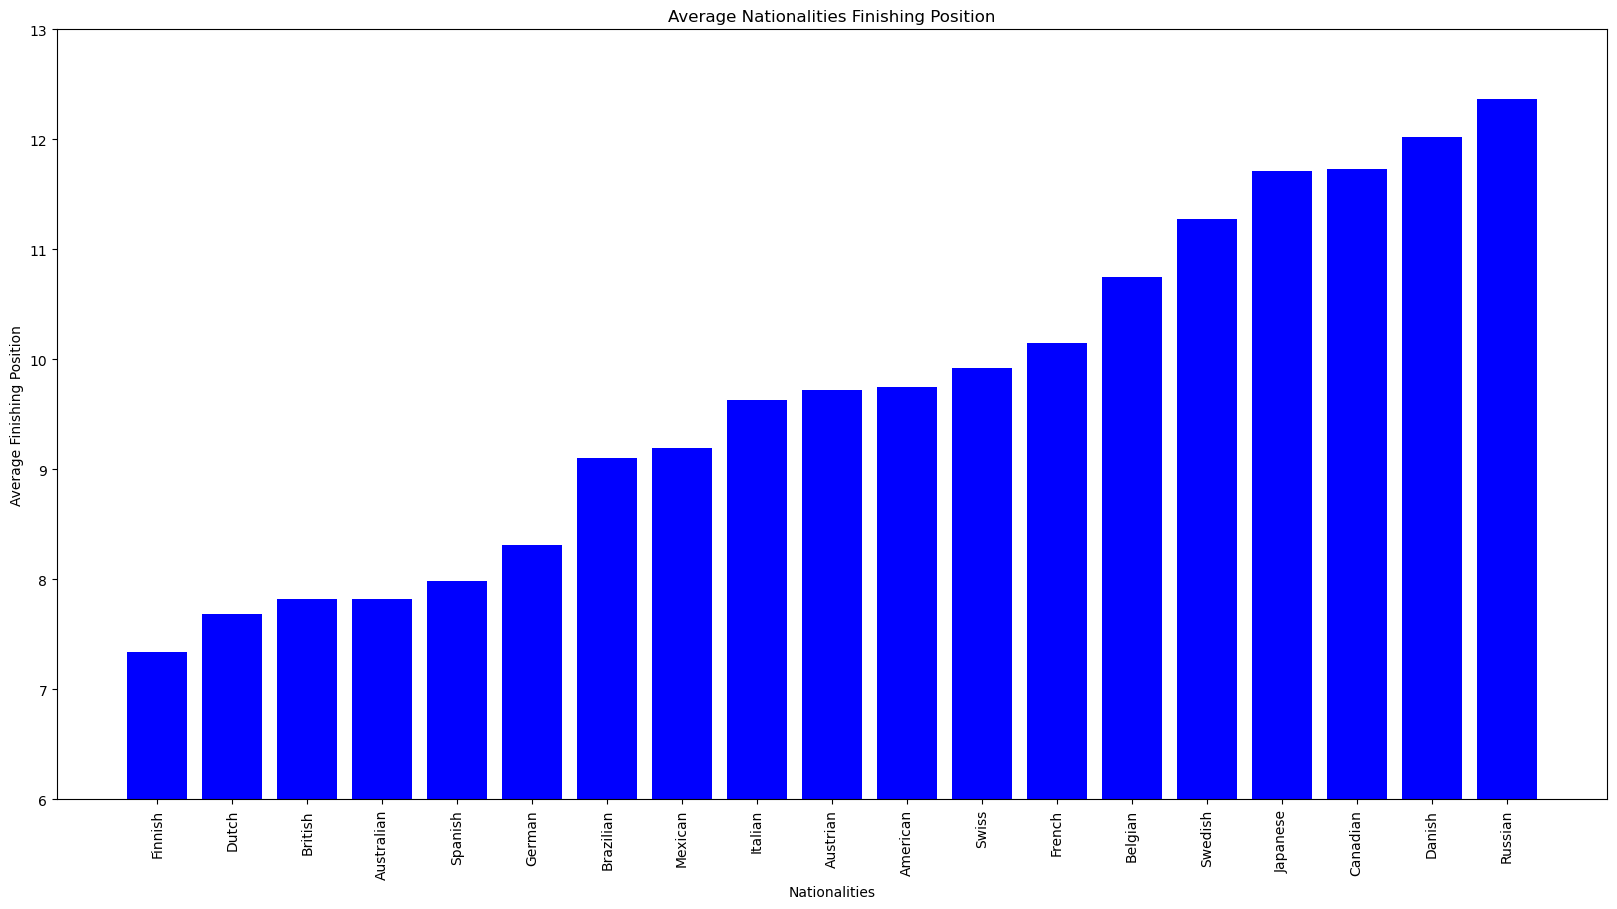

In [176]:
display(final_position)

#Position Visualization:
plt.figure(figsize=(20, 10))
plt.bar(data=final_position, height="mean_position", x="nationality", color="blue")
plt.ylim(6, 13)
#labels:
plt.xlabel("Nationalities")
plt.ylabel("Average Finishing Position")
plt.title("Average Nationalities Finishing Position")
plt.xticks(rotation=90)

## Fastest Lap Speed Visualization Analysis:

,nationality,mean_fastestLapSpeed,count_races
4,Austrian,211.448755,144
8,Canadian,208.780240,220
14,Dutch,206.507278,228
23,Italian,206.081609,795
16,Finnish,205.913130,593
24,Japanese,205.115899,252
7,British,204.548283,1435
3,Australian,204.357562,412
35,Spanish,204.138822,535
18,German,203.882677,1222


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Austrian'),
  Text(1, 0, 'Canadian'),
  Text(2, 0, 'Dutch'),
  Text(3, 0, 'Italian'),
  Text(4, 0, 'Finnish'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'British'),
  Text(7, 0, 'Australian'),
  Text(8, 0, 'Spanish'),
  Text(9, 0, 'German'),
  Text(10, 0, 'Danish'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Mexican'),
  Text(13, 0, 'Brazilian'),
  Text(14, 0, 'Russian'),
  Text(15, 0, 'Belgian'),
  Text(16, 0, 'Swiss'),
  Text(17, 0, 'Swedish'),
  Text(18, 0, 'American')])

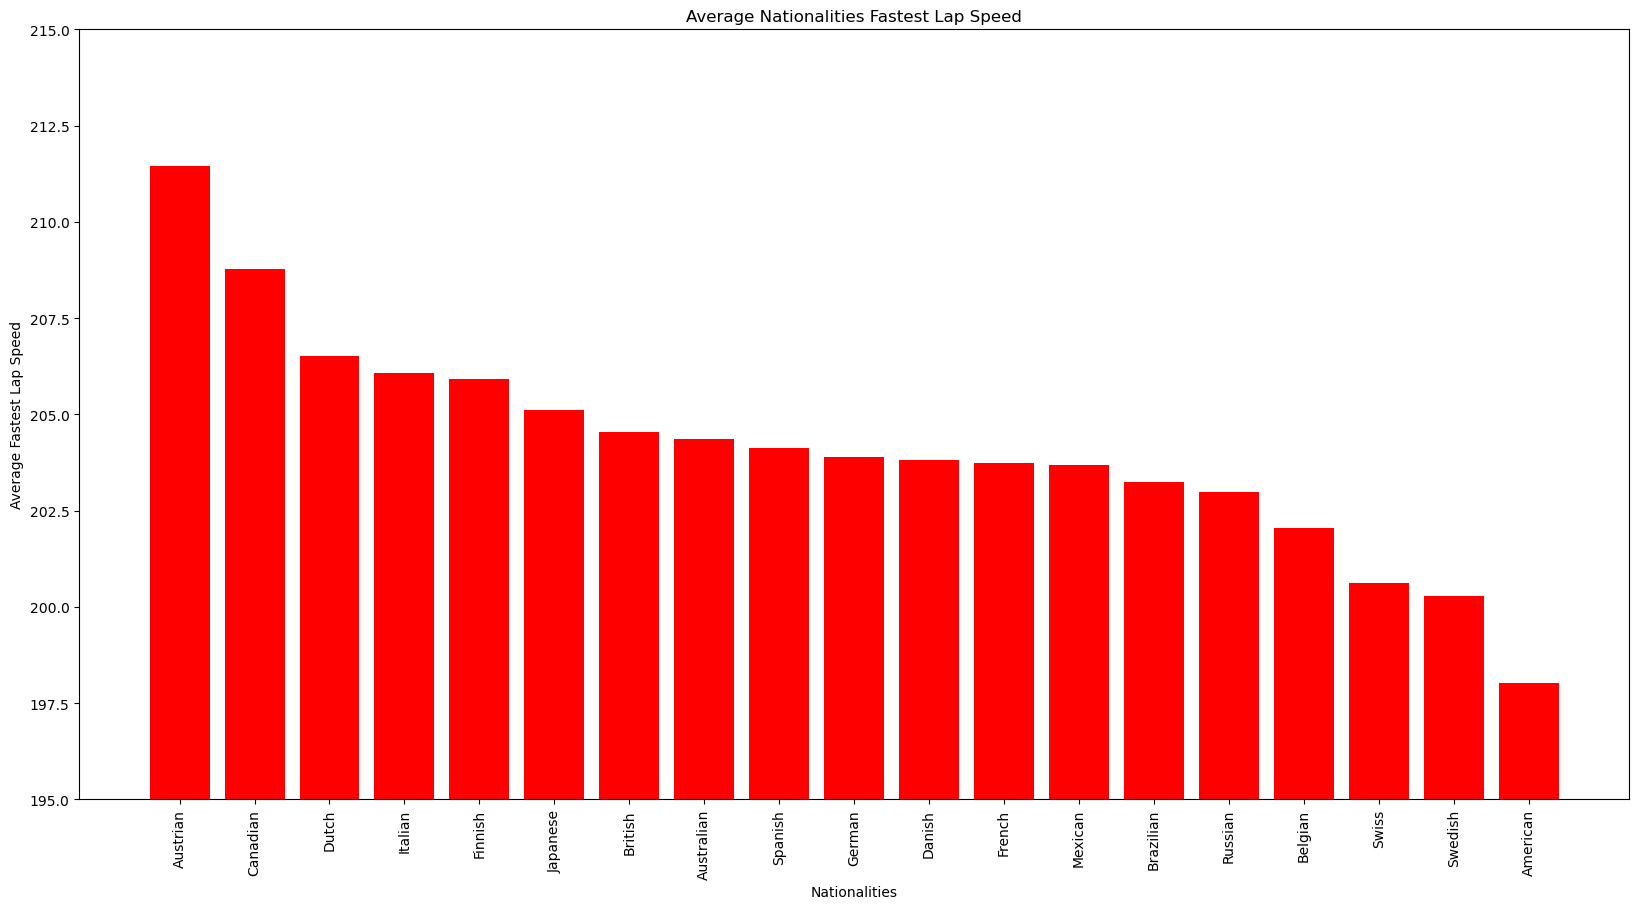

In [177]:
display(final_fastestLapSpeed)

#FastestLapSpeed Visualization:
plt.figure(figsize=(20, 10))
plt.bar(data=final_fastestLapSpeed, height="mean_fastestLapSpeed", x="nationality", color="red")
plt.ylim(195, 215)
#labels:
plt.xlabel("Nationalities")
plt.ylabel("Average Fastest Lap Speed")
plt.title("Average Nationalities Fastest Lap Speed")
plt.xticks(rotation=90)

##Findings / Conclusion:

